In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import (read_csv, read_excel)

**DATASETS IMPORT INTO THE INTERFACE.**

##

## 1. WORLD HAPPINESS REPORT(HISTORICAL) DATASET

In [2]:
w_his = read_csv("C:/Users/FeLoH/Desktop/elphy/world-happiness-report [historical]-2.csv")
pd.set_option('display.max_columns', None)
display(w_his)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [3]:
print(f'The world happiness dataset(historical) has a total of {len(w_his.columns)} columns and {len(w_his)} rows.')

The world happiness dataset(historical) has a total of 11 columns and 1949 rows.


**- DATA CLEANING AND PREPROCESSING.**

In [4]:
# dataset information
pd.set_option('display.max_columns', None)
w_his.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [5]:
# Checklist for missing values.
print('The sum of missing values columnwise:'.upper())
print(w_his.isna().sum())
#duplicates detection
print()
print(f"The dataset has a total of {w_his.duplicated().sum()} duplicated rows.")

THE SUM OF MISSING VALUES COLUMNWISE:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

The dataset has a total of 0 duplicated rows.


In [6]:
#handling missing values.
w_his.dropna(inplace = True)
print("The sum of missing values after cleaning:")
print(w_his.isna().sum())
print()
print(f"The new dataset shape after cleaning contains; {len(w_his.columns)} columns and {len(w_his)} rows.")

The sum of missing values after cleaning:
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

The new dataset shape after cleaning contains; 11 columns and 1708 rows.


In [7]:
# variables names and corresponding data types.
print(f'Dataset columns name;\n{w_his.columns}\n')
print(w_his.info())

Dataset columns name;
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 1708 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1708 non-null   object 
 1   year                              1708 non-null   int64  
 2   Life Ladder                       1708 non-null   float64
 3   Log GDP per capita                1708 non-null   float64
 4   Social support                    1708 non-null   float64
 5   Healthy life expectancy at birth  1708 non-null   float64
 6   Freedom to make life choices      1708 non-null   float64
 7   Generosity              

##

**Q1. Happiest and unhappiest countries using the groupby function.**

In [8]:
#w_his.groupby('Country name')['Life Ladder'].mean()
c_happiness = w_his.groupby('Country name').agg({'Life Ladder': 'mean'})
dta = c_happiness.sort_values(['Life Ladder'])
print("Top 10 unhappiest countries:")
display(dta.head(n = 10))
print('Top 10 happiest countries:')
display(dta.tail(n = 10))

Top 10 unhappiest countries:


,Life Ladder
Country name,
Central African Republic,3.515000
Burundi,3.548200
Togo,3.555000
Afghanistan,3.594667
Rwanda,3.603455
Tanzania,3.697333
Zimbabwe,3.882600
Comoros,3.944000
Haiti,3.954182


Top 10 happiest countries:


,Life Ladder
Country name,
Australia,7.277538
New Zealand,7.310286
Canada,7.368786
Sweden,7.369000
Iceland,7.434143
Netherlands,7.466462
Norway,7.512400
Switzerland,7.548300
Finland,7.597154


**End of Q1**

**Q2.Trend analysis of top happiest and unhappiest countries**

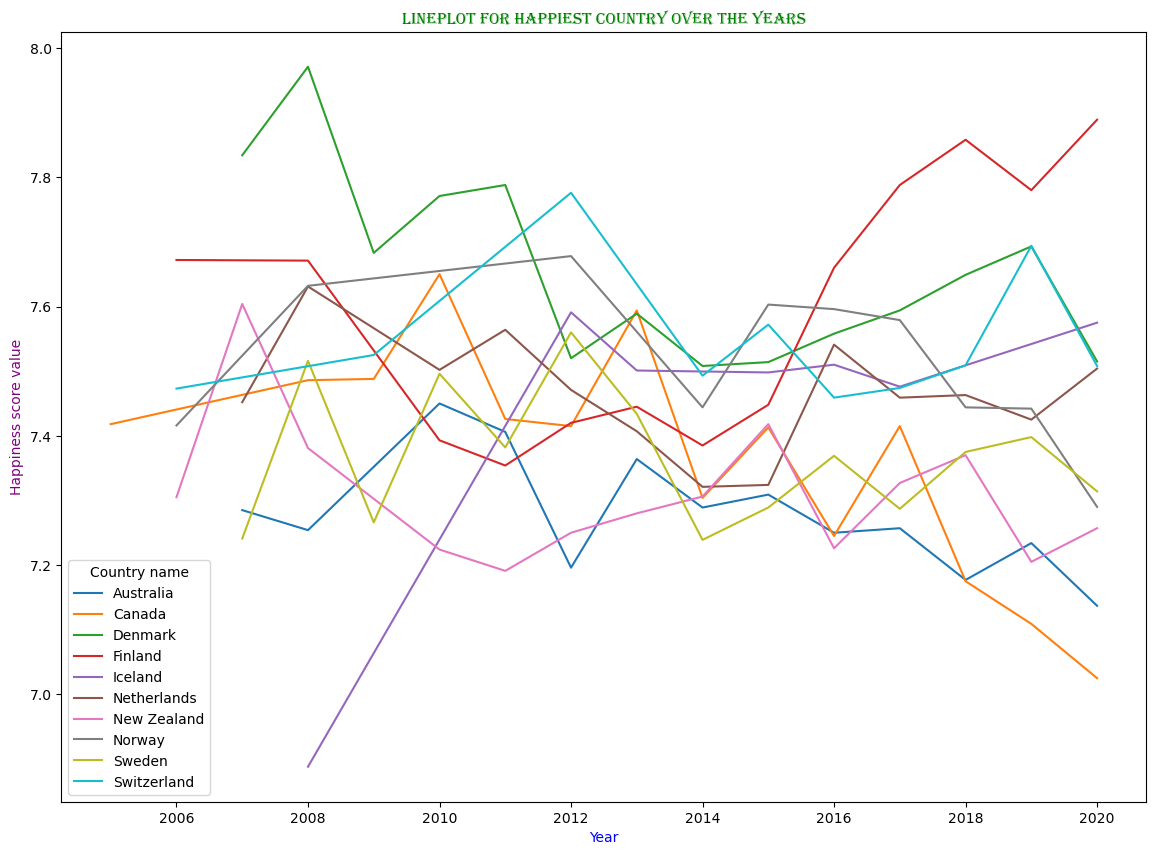

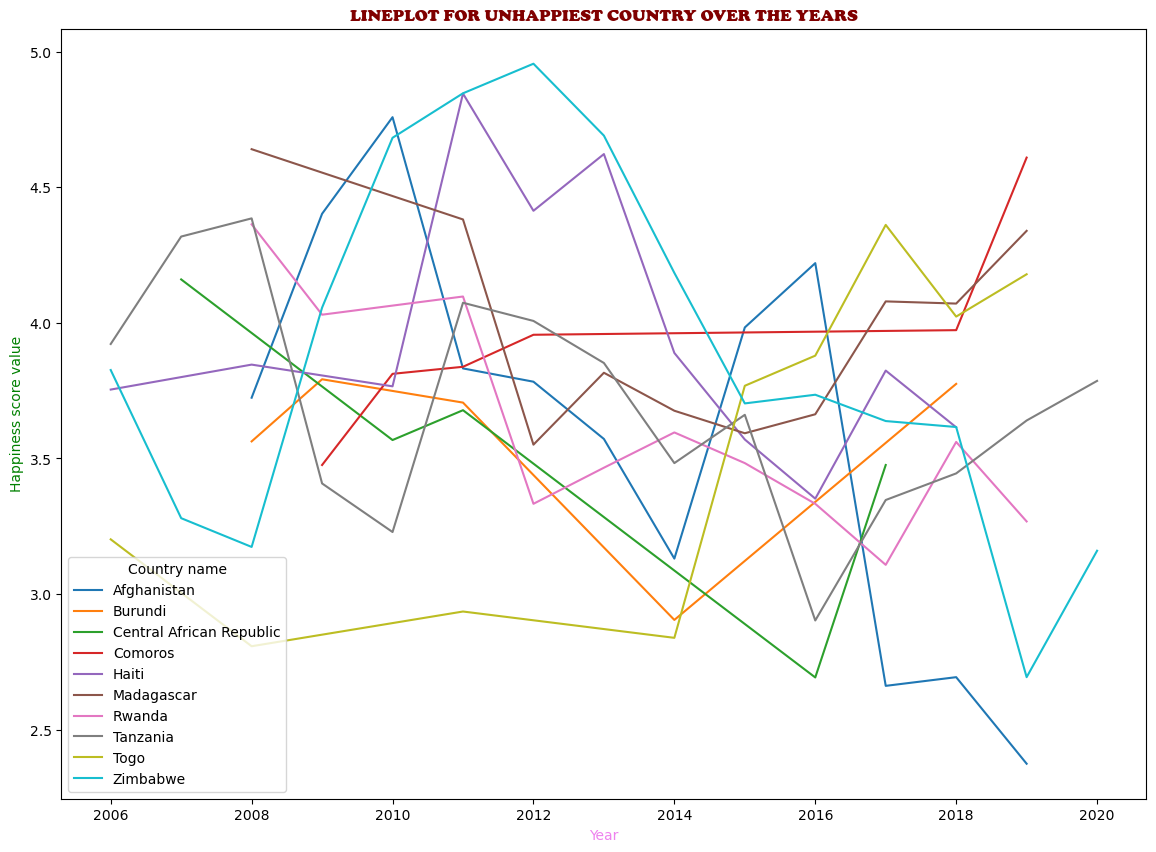

DISCUSSION 
- Finland recorded a highest ladder score among all happiest countries by the end of 2020 while, Canada had the lowest happiness score.
- Togo had the lowest happiness score among the unhappiest countries upto 2014 before starting to increase afterwards.
- By the end of 2019, Comoros recorded a highest happiness score than other unhappiest countries while, Afghanistan had the lowest Ladder score.


In [9]:
unhappiest_country = ['Central African Republic','Burundi','Togo','Afghanistan','Rwanda','Tanzania','Zimbabwe','Comoros','Haiti','Madagascar']
happiest_country = ['Australia','New Zealand','Canada','Sweden','Iceland','Netherlands','Norway','Switzerland','Finland','Denmark']
df_unhappiest = w_his[w_his['Country name'].isin(unhappiest_country)]
df_happiest = w_his[w_his['Country name'].isin(happiest_country)]
# happiest country
plt.figure(figsize=(14,10))
sns.lineplot(data = df_happiest, x = 'year', y = 'Life Ladder', hue = 'Country name')
plt.title('Lineplot for happiest country over the years'.upper(), fontname = 'Algerian', fontsize = 12, color = 'green')
plt.xlabel('Year', color = 'blue')
plt.ylabel('Happiness score value', color = 'purple')
plt.show()
print()
# unhappiest country
plt.figure(figsize=(14,10))
sns.lineplot(data = df_unhappiest, x = 'year', y = 'Life Ladder', hue = 'Country name')
plt.title('Lineplot for unhappiest country over the years'.upper(), fontname = 'Cooper Black', fontsize = 12, color = 'maroon')
plt.xlabel('Year', color = 'violet')
plt.ylabel('Happiness score value', color = 'green')
plt.show()
print('DISCUSSION ')
print('- Finland recorded a highest ladder score among all happiest countries by the end of 2020 while, Canada had the lowest happiness score.')
print('- Togo had the lowest happiness score among the unhappiest countries upto 2014 before starting to increase afterwards.')
print('- By the end of 2019, Comoros recorded a highest happiness score than other unhappiest countries while, Afghanistan had the lowest Ladder score.')

**End of Q2**

##

**Q3. correlation between happiness score with life expectancy and GDP data.**

(1708, 3)


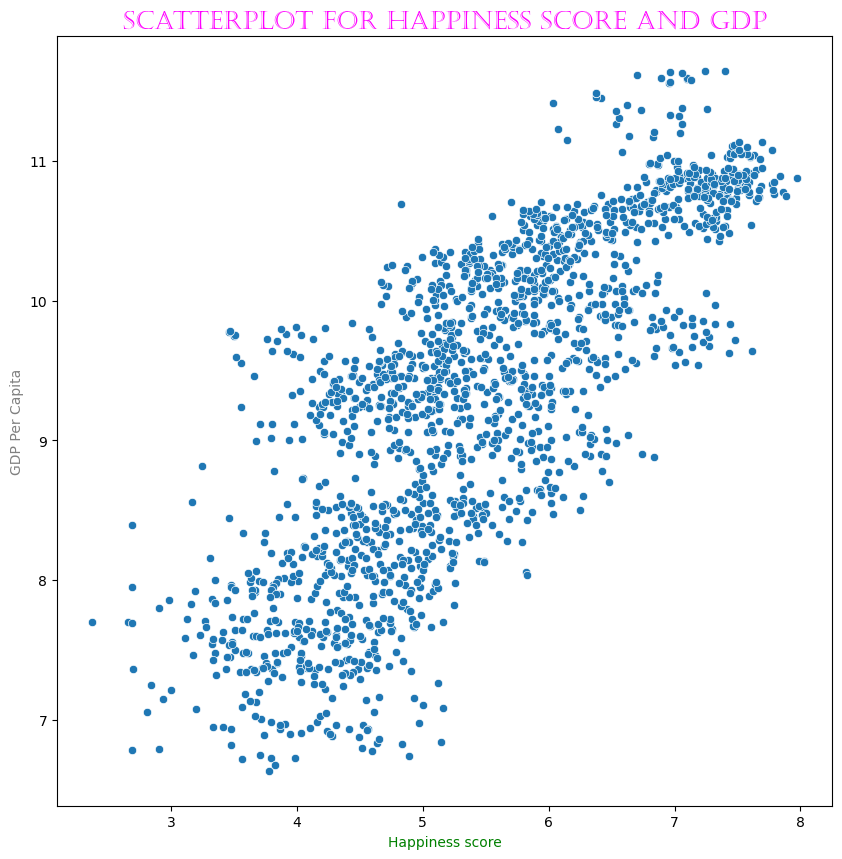

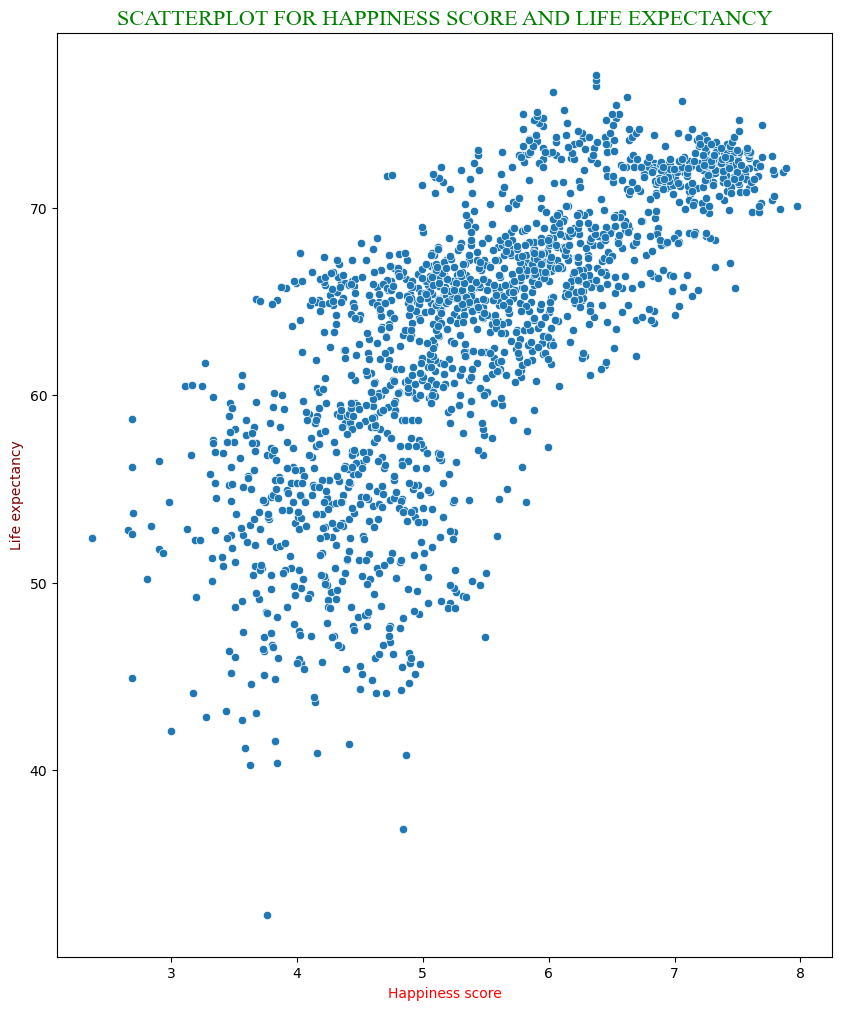

---DISCUSSION---
Basing on the scatterplots for both attributes; GDP and Life expectancy, it ascertains that, the life expectancies and GDP increases with an increase in the happiness score.


In [10]:
hlg = w_his[['Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth']]
print(hlg.shape)
# scatterplot visualization
plt.figure(figsize=(10,10))
sns.scatterplot(data = hlg, x = 'Life Ladder', y = 'Log GDP per capita')
plt.title("Scatterplot for happiness score and GDP",fontsize=18,fontname="Castellar",color="magenta")
plt.xlabel("Happiness score",color="green")
plt.ylabel("GDP Per Capita",color="grey")
plt.show()
print()
print()
plt.figure(figsize=(10,12))
sns.scatterplot(data = hlg, x = 'Life Ladder', y = 'Healthy life expectancy at birth')
plt.title("Scatterplot for happiness score and life expectancy".upper(),fontsize=16,fontname="Times New Roman",color="green")
plt.xlabel("Happiness score",color="red")
plt.ylabel("Life expectancy",color="maroon")
plt.show()
print('---discussion---'.upper())
print("Basing on the scatterplots for both attributes; GDP and Life expectancy, it ascertains that, the life expectancies and GDP increases with an increase in the happiness score.")

**End of Q3**

##

##

## 2. WORLD HAPPINESS DATASET

In [11]:
w_happ = read_csv("C:/Users/FeLoH/Desktop/elphy/world-happiness-report-2021-1.csv")
#pd.set_option('display.max_columns', None)
w_happ.head()
#display(w_happ)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [12]:
print(f"The world happiness report dataset has {w_happ.shape[0]} rows and {w_happ.shape[1]} columns.")

The world happiness report dataset has 149 rows and 20 columns.


In [13]:
# dataset information
pd.set_option('display.max_columns', None)
w_happ.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [14]:
# variables names and corresponding data types.
print(f'Dataset columns name;\n{w_happ.columns}\n')
print(w_happ.info())

Dataset columns name;
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indi

In [15]:
print('The sum of missing values columnwise:'.upper())
print(w_happ.isna().sum())
#duplicates detection
print()
print(f"The dataset has a total of {w_happ.duplicated().sum()} duplicated rows.")

THE SUM OF MISSING VALUES COLUMNWISE:
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dt

##

**Q4. Happiness score by continents or regions.**

In [16]:
w_happ.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


In [17]:
reg_happ = w_happ.groupby('Regional indicator').agg({'Ladder score': 'mean'})
display(reg_happ.sort_values(['Ladder score']))
print('- North America and ANZ Region recorded a highest happiness score compared to the rest regions.\n- While, South Asia tend to have a lowest happiness score.')

,Ladder score
Regional indicator,
South Asia,4.441857
Sub-Saharan Africa,4.494472
Middle East and North Africa,5.219765
Southeast Asia,5.407556
Commonwealth of Independent States,5.467000
East Asia,5.810333
Latin America and Caribbean,5.908050
Central and Eastern Europe,5.984765
Western Europe,6.914905


- North America and ANZ Region recorded a highest happiness score compared to the rest regions.
- While, South Asia tend to have a lowest happiness score.


**End of Q4**

##

**Q5. Plot for relationship between happiness score and measures of corruption and freedom.**

In [18]:
# seecting attributes to test for coreelation with happiness score.
h_c_f = w_happ[['Ladder score', 'Freedom to make life choices', 'Perceptions of corruption']]
print(h_c_f.shape)

(149, 3)


,Ladder score,Freedom to make life choices,Perceptions of corruption
Ladder score,1.000000,0.607753,-0.421140
Freedom to make life choices,0.607753,1.000000,-0.401363
Perceptions of corruption,-0.421140,-0.401363,1.000000


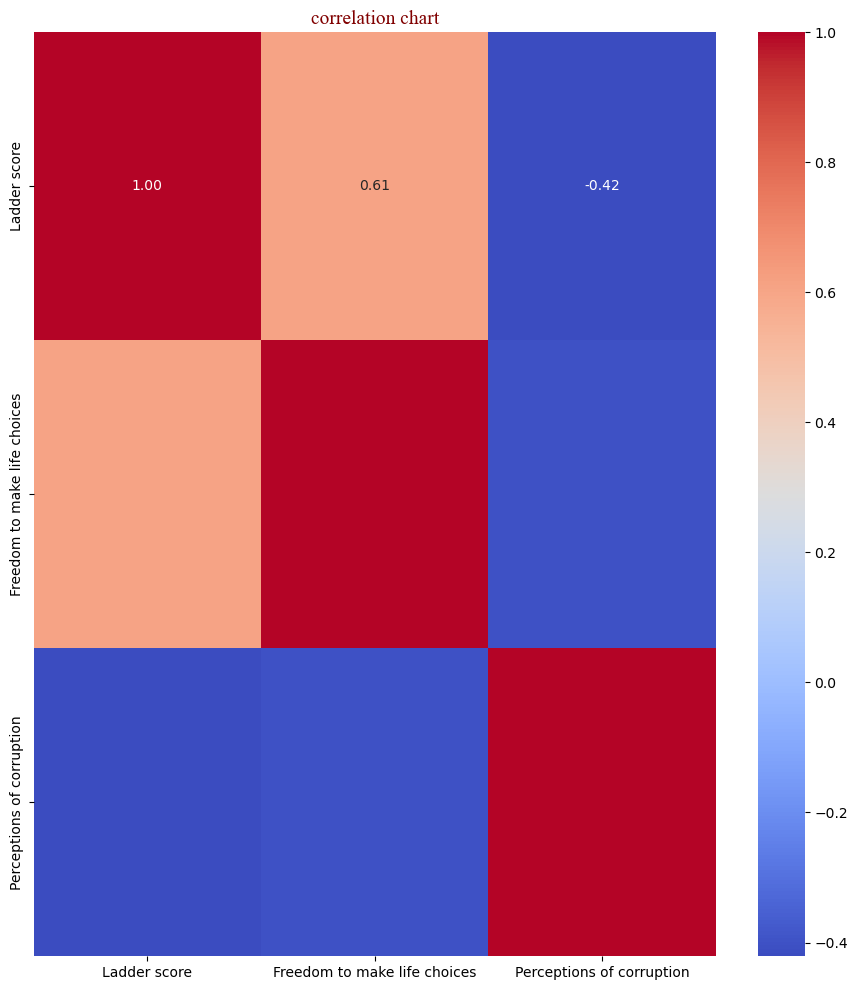


DISCUSION.
- Using the correlation chart, Happiness score has a strong positive relationship with freedom to make choices unlike perception of corruption which has a weak negative relationship.


In [19]:
# for correlation to give non-NaN values we need to select columns with levels greater than 1 unique values so as to have a non-constant variance
correlation_data=h_c_f.loc[:, h_c_f.nunique() > 1]
pd.set_option("display.max_columns",None)
display(correlation_data.corr())
#visualizing frequencies using heatmap
plt.figure(figsize=(11,12))
plt.title("correlation chart", fontname="Times New Roman", fontsize=14, color="maroon")
sns.heatmap(correlation_data.corr(),cmap="coolwarm",fmt='.2f',annot=True)
plt.show()
print('\nDISCUSION.\n- Using the correlation chart, Happiness score has a strong positive relationship with freedom to make choices unlike perception of corruption which has a weak negative relationship.')

**End of Q5**

##

##

## 3. GLOBAL AIR POLLUTION DATASET

In [20]:
glo_pop = read_csv("C:/Users/FeLoH/Desktop/elphy/global_air_pollution_data-1.csv")
pd.set_option('display.max_columns', None)
display(glo_pop)

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [21]:
print(f'The global air pollution dataset has a total of {len(glo_pop.columns)} columns and {len(glo_pop)} rows.')

The global air pollution dataset has a total of 12 columns and 23463 rows.


In [22]:
# dataset information
pd.set_option('display.max_columns', None)
glo_pop.describe()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [23]:
# variables names and corresponding data types.
print(f'Dataset columns name;\n{glo_pop.columns}\n')
print(glo_pop.info())

Dataset columns name;
Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23

In [24]:
print('The sum of missing values columnwise:'.upper())
print(glo_pop.isna().sum())
#duplicates detection
print()
print(f"The dataset has a total of {glo_pop.duplicated().sum()} duplicated rows.")

THE SUM OF MISSING VALUES COLUMNWISE:
country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

The dataset has a total of 0 duplicated rows.


In [25]:
#handling missing values.
glo_pop.dropna(inplace = True)
print("The sum of missing values after cleaning:")
print(glo_pop.isna().sum())
print()
print(f"The new dataset shape after cleaning contains; {len(glo_pop.columns)} columns and {len(glo_pop)} rows.")

The sum of missing values after cleaning:
country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

The new dataset shape after cleaning contains; 12 columns and 23035 rows.


##

##

## 4. POPULATION BY COUNTRY DATASET.

In [26]:
pop_country = read_csv("C:/Users/FeLoH/Desktop/elphy/population_by_country_2020-1.csv")
pop_country

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [27]:
print('The shape of the dataset is:', len(pop_country.columns), 'columns and', len(pop_country), 'rows.')

The shape of the dataset is: 11 columns and 235 rows.


In [28]:
# dataset information
pd.set_option('display.max_columns', None)
pop_country.describe()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.322744e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.353034e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.994905e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.460109e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.067170e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000


In [29]:
# variables names and corresponding data types.
print(f'Dataset columns name;\n{pop_country.columns}\n')
print(pop_country.info())

Dataset columns name;
Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null 

In [30]:
print('The sum of missing values columnwise:'.upper())
print(pop_country.isna().sum())
#duplicates detection
print()
print(f"The dataset has a total of {pop_country.duplicated().sum()} duplicated rows.")

THE SUM OF MISSING VALUES COLUMNWISE:
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

The dataset has a total of 0 duplicated rows.


In [31]:
#handling missing values.
pop_country.dropna(inplace = True)
print("The sum of missing values after cleaning:")
print(pop_country.isna().sum())
print()
print(f"The new dataset shape after cleaning contains; {len(pop_country.columns)} columns and {len(pop_country)} rows.")

The sum of missing values after cleaning:
Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

The new dataset shape after cleaning contains; 11 columns and 201 rows.


In [75]:
# Merging world happiness data and population data on country name as a key.
pop_country.rename(columns = {'Country (or dependency)':'Country name'}, inplace = True)
d_merg = pd.merge(w_happ, pop_country, on = 'Country name', how = 'inner')
display(d_merg)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,5542237,0.15 %,8564,18,303890,14000.0,1.5,43,86 %,0.07 %
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,5795780,0.35 %,20326,137,42430,15200.0,1.8,42,88 %,0.07 %
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,8665615,0.74 %,63257,219,39516,52000.0,1.5,43,74 %,0.11 %
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,341628,0.65 %,2212,3,100250,380.0,1.8,37,94 %,0.00 %
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,17141544,0.22 %,37742,508,33720,16000.0,1.7,43,92 %,0.22 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,2145194,0.80 %,16981,71,30360,-10047.0,3.2,24,31 %,0.03 %
136,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,2359585,2.08 %,47930,4,566730,3000.0,2.9,24,73 %,0.03 %
137,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,13005303,2.58 %,325268,525,24670,-9000.0,4.1,20,18 %,0.17 %
138,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,14899771,1.48 %,217456,38,386850,-116858.0,3.6,19,38 %,0.19 %


**Q6. happiness score relationship on population and population density.**

In [33]:
# filtering columns to use
h_popu = d_merg[['Ladder score', 'Density (P/Km²)', 'Population (2020)']]
print(h_popu.shape)

(140, 3)


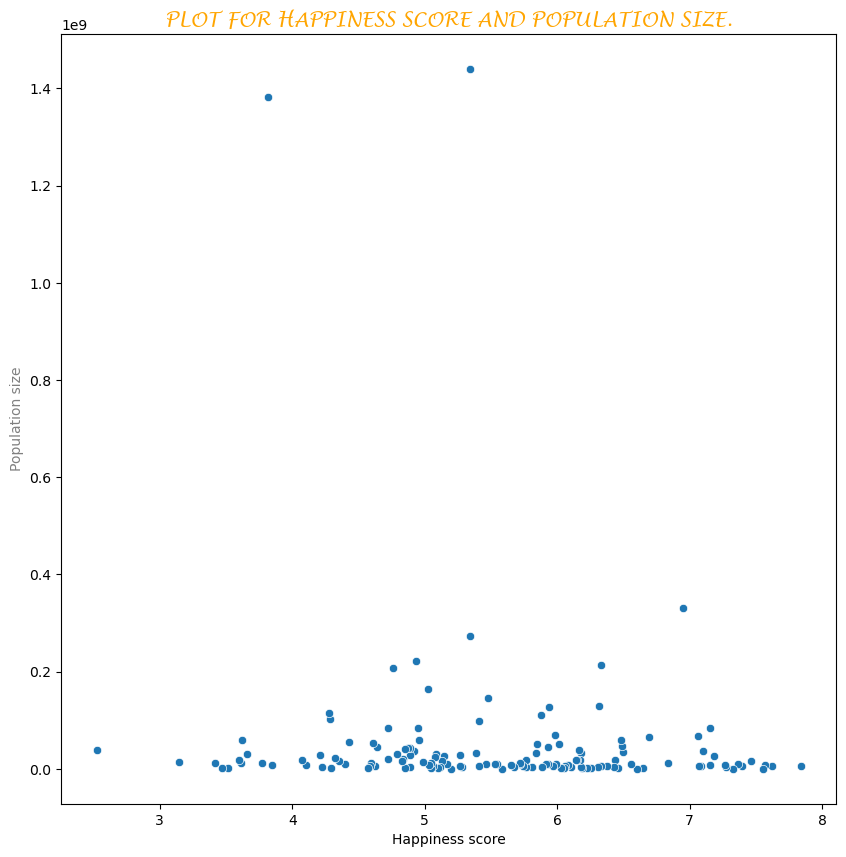

In [34]:
# scatterplot visual
plt.figure(figsize = (10,10))
sns.scatterplot(data = h_popu, x = 'Ladder score', y = 'Population (2020)')
plt.title('Plot for happiness score and population size.'.upper(), fontname="Lucida Handwriting",fontsize=14,color="orange")
plt.xlabel('Happiness score', color = 'black')
plt.ylabel('Population size', color = 'grey')
plt.show()

In [35]:
print('Correlation Matrix:')
display(h_popu.corr())
print('DISCUSSION')
print('The scatterplot together with the correlation matrix suffices that, happiness score has a weak correlation effect to the population size and density.')

Correlation Matrix:


,Ladder score,Density (P/Km²),Population (2020)
Ladder score,1.000000,0.075479,-0.103921
Density (P/Km²),0.075479,1.000000,0.000591
Population (2020),-0.103921,0.000591,1.000000


DISCUSSION
The scatterplot together with the correlation matrix suffices that, happiness score has a weak correlation effect to the population size and density.


**End of Q6**

##

**Q7.Happiness score reationship with urban density population.**

In [81]:
d_merg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                140 non-null    object 
 1   Regional indicator                          140 non-null    object 
 2   Ladder score                                140 non-null    float64
 3   Standard error of ladder score              140 non-null    float64
 4   upperwhisker                                140 non-null    float64
 5   lowerwhisker                                140 non-null    float64
 6   Logged GDP per capita                       140 non-null    float64
 7   Social support                              140 non-null    float64
 8   Healthy life expectancy                     140 non-null    float64
 9   Freedom to make life choices                140 non-null    float64
 10  Generosity    

In [86]:
# converting urban pop object datatype into standard float types 
d_merg['Urban Pop %'] = pd.to_numeric(
    d_merg['Urban Pop %'].str.replace('%', '',regex=False),
    errors='coerce'
)
d_merg.info()
print('\n\n')
print('Sample of new urban population:')
d_merg['Urban Pop %'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                140 non-null    object 
 1   Regional indicator                          140 non-null    object 
 2   Ladder score                                140 non-null    float64
 3   Standard error of ladder score              140 non-null    float64
 4   upperwhisker                                140 non-null    float64
 5   lowerwhisker                                140 non-null    float64
 6   Logged GDP per capita                       140 non-null    float64
 7   Social support                              140 non-null    float64
 8   Healthy life expectancy                     140 non-null    float64
 9   Freedom to make life choices                140 non-null    float64
 10  Generosity    

0    86.0
1    88.0
2    74.0
3    94.0
4    92.0
Name: Urban Pop %, dtype: float64

In [98]:
#getting total population size of urban population from total population
d_merg['Urban_size'] = d_merg['Urban Pop %'] * d_merg['Population (2020)']/100
print('Urban population size:')
print(d_merg['Urban_size'].head())
print('\n')
# density in urban
d_merg['Urban_Density (P/Km²)'] = (d_merg['Population (2020)'] * d_merg['Density (P/Km²)']) / d_merg['Urban_size']
print(d_merg[['Population (2020)', 'Density (P/Km²)', 'Urban_size', 'Urban_Density (P/Km²)']].head())
#relationship between attributes
happ_urban = d_merg[['Ladder score', 'Urban_Density (P/Km²)']]
print('\n')
print('Correlation coefficient matrix:')
display(happ_urban.corr(method = 'pearson'))
print('\n')
print('DISCUSSION')
print('From the correlation coefficient matrix, it suffices that living in Urban densely populated areas negatively affect the Happiness score.')

Urban population size:
0     4766323.82
1     5100286.40
2     6412555.10
3      321130.32
4    15770220.48
Name: Urban_size, dtype: float64


   Population (2020)  Density (P/Km²)   Urban_size  Urban_Density (P/Km²)
0            5542237               18   4766323.82              20.930233
1            5795780              137   5100286.40             155.681818
2            8665615              219   6412555.10             295.945946
3             341628                3    321130.32               3.191489
4           17141544              508  15770220.48             552.173913


Correlation coefficient matrix:


,Ladder score,Urban_Density (P/Km²)
Ladder score,1.000000,-0.193206
Urban_Density (P/Km²),-0.193206,1.000000




DISCUSSION
From the correlation coefficient matrix, it suffices that living in Urban densely populated areas negatively affect the Happiness score.


**END OF Q7**

**Q8. Happiness score relationship with fertility rate.**

In [37]:
h_fert = d_merg[['Ladder score', 'Fert. Rate']]
display(h_fert.corr(method = 'pearson'))
print()
print('Discussion'.upper())
print('The correlation matrix highlights that there is a strong correlation between happiness score and fertility rate. Thus, there is a higher tendency of most happy people having more children.')

,Ladder score,Fert. Rate
Ladder score,1.000000,-0.625741
Fert. Rate,-0.625741,1.000000



DISCUSSION
The correlation matrix highlights that there is a strong correlation between happiness score and fertility rate. Thus, there is a higher tendency of most happy people having more children.


**End of Q8**

**Q9. Identifying countries that improved or dropped their happiness scores than before.**

In [38]:
#Using the historic data
c_happiness = w_his.groupby('Country name').agg({'Life Ladder': 'mean'})
dta = c_happiness.sort_values(['Life Ladder'])
print('Top 10 happiest countries before:')
display(dta.tail(n = 10))
# using the world happiness report 2024 data
print()
country_rank_happ = w_happ.groupby('Country name').agg({'Ladder score': 'mean'})
new_ranks = country_rank_happ.sort_values(['Ladder score'])
print('Top 10 happiest countries afterwards:')
display(new_ranks.tail(n = 10))
print('DISCUSSION')
print('Canada that was formely happy became less happy than before, and Luxembourg improved its happiness score than before.')

Top 10 happiest countries before:


,Life Ladder
Country name,
Australia,7.277538
New Zealand,7.310286
Canada,7.368786
Sweden,7.369000
Iceland,7.434143
Netherlands,7.466462
Norway,7.512400
Switzerland,7.548300
Finland,7.597154



Top 10 happiest countries afterwards:


,Ladder score
Country name,
Austria,7.268
New Zealand,7.277
Luxembourg,7.324
Sweden,7.363
Norway,7.392
Netherlands,7.464
Iceland,7.554
Switzerland,7.571
Denmark,7.620


DISCUSSION
Canada that was formely happy became less happy than before, and Luxembourg improved its happiness score than before.


**End of Q9**

**Q12 Relationship between happiness score and air quality metrics**

In [39]:
glo_pop.rename(columns = {'country_name':'Country name'}, inplace = True)
happ_airquality = pd.merge(w_happ,glo_pop,how = 'inner', on = 'Country name')
happ_airquality

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Pori,30,Good,1,Good,30,Good,1,Good,15,Good
1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Imatra,29,Good,1,Good,29,Good,1,Good,7,Good
2,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Pietarsaari,34,Good,1,Good,34,Good,1,Good,17,Good
3,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Heinola,33,Good,0,Good,33,Good,0,Good,5,Good
4,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Kajaani,32,Good,1,Good,32,Good,0,Good,24,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17265,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,Asadabad,131,Unhealthy for Sensitive Groups,1,Good,43,Good,0,Good,131,Unhealthy for Sensitive Groups
17266,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,Taywarah,62,Moderate,0,Good,39,Good,0,Good,62,Moderate
17267,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,Kholm,123,Unhealthy for Sensitive Groups,1,Good,35,Good,0,Good,123,Unhealthy for Sensitive Groups
17268,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895,Eskasem,85,Moderate,0,Good,14,Good,0,Good,85,Moderate


In [40]:
air_metrics = happ_airquality[['Ladder score','aqi_value','co_aqi_value\t','ozone_aqi_value','no2_aqi_value','pm2.5_aqi_value']]
air_metrics.shape

(17270, 6)

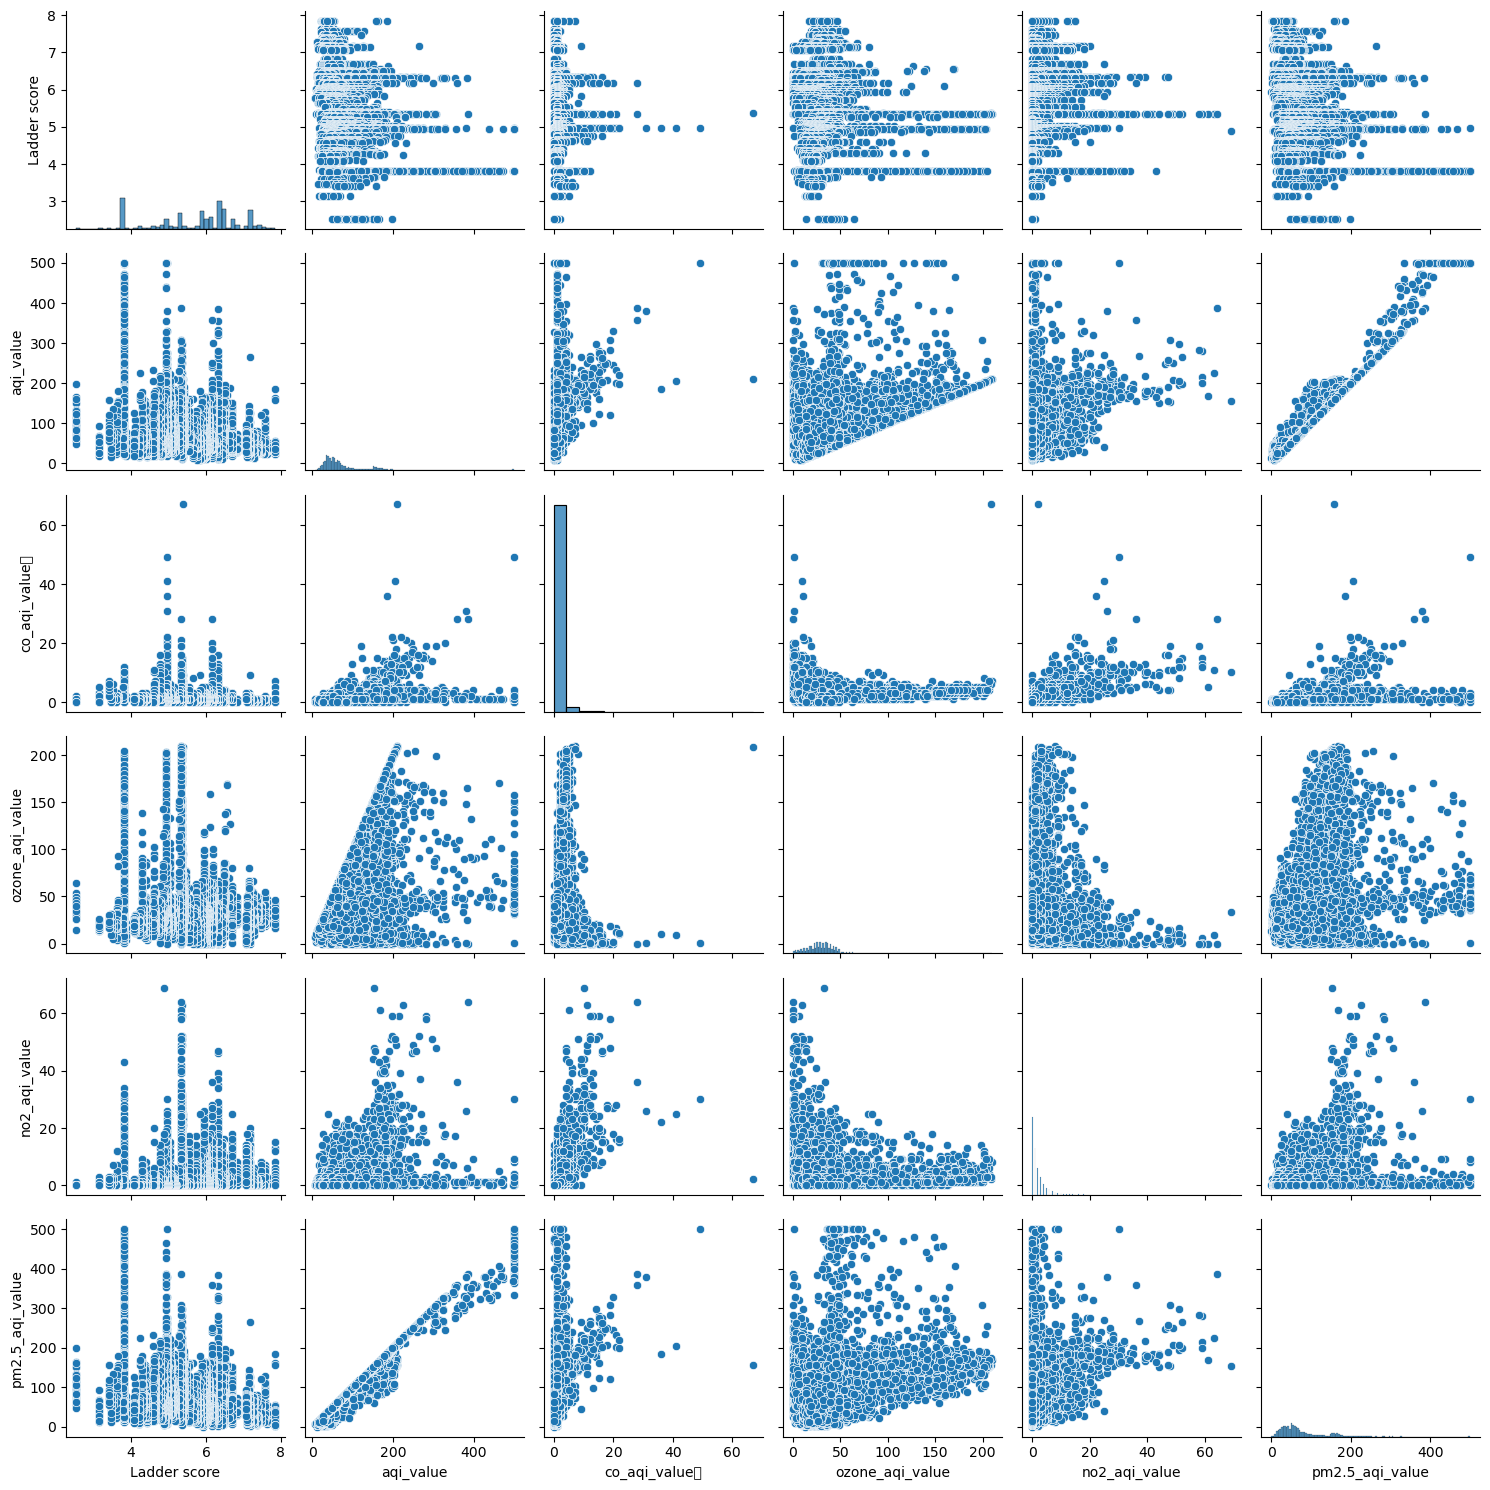

In [41]:
# relationship between happiness score and the air quality metrics
sns.pairplot(air_metrics)
plt.tight_layout()
plt.show()

In [42]:
print('Correlation coeficients matrix:')
display(air_metrics.corr(method='pearson'))
print('\n')
print('DISCUSSION')
print('- Happiness score have a strong correlation degree with air quality index(aqi_value), and particulate matter(pm2.5_aqi_value).\n- There is a weak correlation effect betwen happiness score and the gaseous pollutants; co_aqi_value\t, ozone_aqi_value, and no2_aqi_value.')

Correlation coeficients matrix:


,Ladder score,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
Ladder score,1.000000,-0.507913,-0.198451,-0.254035,0.038576,-0.521529
aqi_value,-0.507913,1.000000,0.442021,0.416064,0.285120,0.985749
co_aqi_value\t,-0.198451,0.442021,1.000000,0.196995,0.635103,0.451914
ozone_aqi_value,-0.254035,0.416064,0.196995,1.000000,-0.121348,0.357210
no2_aqi_value,0.038576,0.285120,0.635103,-0.121348,1.000000,0.310797
pm2.5_aqi_value,-0.521529,0.985749,0.451914,0.357210,0.310797,1.000000




DISCUSSION
- Happiness score have a strong correlation degree with air quality index(aqi_value), and particulate matter(pm2.5_aqi_value).
- There is a weak correlation effect betwen happiness score and the gaseous pollutants; co_aqi_value	, ozone_aqi_value, and no2_aqi_value.


**END OF Q12**

##

**End of Exploratory Data Analysis ON World Happiness Report Data.**    

**END OF SECTION 1** 

##

##

##

## 5. NOBEL PRIZE DATASET

In [43]:
nobel = read_csv("C:/Users/FeLoH/Desktop/elphy/Nobel Prize-3.csv")
nobel

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,categoryTopMotivation,award_link,id,name,knownName,givenName,familyName,fullName,penName,gender,laureate_link,birth_date,birth_city,birth_cityNow,birth_continent,birth_country,birth_countryNow,birth_locationString,death_date,death_city,death_cityNow,death_continent,death_country,death_countryNow,death_locationString,orgName,nativeName,acronym,org_founded_date,org_founded_city,org_founded_cityNow,org_founded_continent,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,1901,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,1,1,150782,8567159,NaN,received,"for his work on serum therapy, especially its ...",NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,293,Emil von Behring,Emil von Behring,Emil,von Behring,Emil Adolf von Behring,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1854-03-15,Hansdorf,Lawice,Europe,Prussia,Poland,"Hansdorf, Prussia (now Lawice, Poland)",31/03/1917,Marburg,Marburg,Europe,Germany,Germany,"Marburg, Germany",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Marburg University, Marburg, Germany",NaN,NaN,NaN
1,1901,Peace,The Nobel Peace Prize,2,01-Feb,150782,8567159,10/12/1901,received,for his lifelong work for international peace ...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,463,Frédéric Passy,Frédéric Passy,Frédéric,Passy,Frédéric Passy,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1822-05-20,Paris,Paris,Europe,France,France,"Paris, France",12/06/1912,Paris,Paris,Europe,France,France,"Paris, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,France,NaN,NaN,NaN,NaN,NaN
2,1901,Peace,The Nobel Peace Prize,1,01-Feb,150782,8567159,10/12/1901,received,for his humanitarian efforts to help wounded s...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,462,Henry Dunant,Henry Dunant,Henry,Dunant,Jean Henry Dunant,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1828-05-08,Geneva,Geneva,Europe,Switzerland,Switzerland,"Geneva, Switzerland",30/10/1910,Heiden,Heiden,Europe,Switzerland,Switzerland,"Heiden, Switzerland",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,Switzerland,NaN,NaN,NaN,NaN,NaN
3,1901,Chemistry,The Nobel Prize in Chemistry,1,1,150782,8567159,NaN,received,in recognition of the extraordinary services h...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,160,Jacobus H. van 't Hoff,Jacobus H. van 't Hoff,Jacobus H.,van 't Hoff,Jacobus Henricus van 't Hoff,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1852-08-30,Rotterdam,Rotterdam,Europe,the Netherlands,the Netherlands,"Rotterdam, the Netherlands",01/03/1911,Berlin,Berlin,Europe,Germany,Germany,"Berlin, Germany",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Berlin University, Berlin, Germany",NaN,NaN,NaN
4,1901,Literature,The Nobel Prize in Literature,1,1,150782,8567159,NaN,received,in special recognition of his poetic compositi...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,569,Sully Prudhomme,Sully Prudhomme,Sully,Prudhomme,Sully Prudhomme,(pen-name of René François Armand Prudhomme),male,http://masterdataapi.nobelprize.org/2/laureate...,1839-03-16,Paris,Paris,Europe,France,France,"Paris, France",07/09/1907,Châtenay,Châtenay,Europe,France,France,"Châtenay, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,France,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2019,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,3,01-Mar,9000000,9000000,14/10/2019,received,for their experimental approach to alleviating...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,984,Michael Kremer,Mi

In [44]:
print('The shape of the dataset is:', len(nobel.columns), 'columns and', len(nobel), 'rows.')

The shape of the dataset is: 52 columns and 950 rows.


In [45]:
# dataset information
pd.set_option('display.max_columns', None)
nobel.describe()

,awardYear,sortOrder,prizeAmount,prizeAmountAdjusted,id
count,950.000000,950.000000,9.500000e+02,9.500000e+02,950.000000
mean,1971.207368,1.483158,3.460596e+06,6.145681e+06,483.043158
std,33.586969,0.688021,4.014530e+06,3.276874e+06,282.644711
min,1901.000000,1.000000,1.149350e+05,2.377268e+06,1.000000
25%,1947.000000,1.000000,1.703320e+05,3.052326e+06,238.250000
50%,1977.000000,1.000000,7.000000e+05,4.997406e+06,477.500000
75%,2000.000000,2.000000,8.000000e+06,9.044276e+06,727.750000
max,2019.000000,3.000000,1.000000e+07,1.229508e+07,984.000000


In [46]:
# variables names and corresponding data types.
print(f'Dataset columns name;\n{nobel.columns}\n')
print(nobel.info())

Dataset columns name;
Index(['awardYear', 'category', 'categoryFullName', 'sortOrder', 'portion',
       'prizeAmount', 'prizeAmountAdjusted', 'dateAwarded', 'prizeStatus',
       'motivation', 'categoryTopMotivation', 'award_link', 'id', 'name',
       'knownName', 'givenName', 'familyName', 'fullName', 'penName', 'gender',
       'laureate_link', 'birth_date', 'birth_city', 'birth_cityNow',
       'birth_continent', 'birth_country', 'birth_countryNow',
       'birth_locationString', 'death_date', 'death_city', 'death_cityNow',
       'death_continent', 'death_country', 'death_countryNow',
       'death_locationString', 'orgName', 'nativeName', 'acronym',
       'org_founded_date', 'org_founded_city', 'org_founded_cityNow',
       'org_founded_continent', 'org_founded_country',
       'org_founded_countryNow', 'org_founded_locationString', 'ind_or_org',
       'residence_1', 'residence_2', 'affiliation_1', 'affiliation_2',
       'affiliation_3', 'affiliation_4'],
      dtype='object'

In [47]:
print('The sum of missing values columnwise:'.upper())
print(nobel.isna().sum())
#duplicates detection
print()
print(f"The dataset has a total of {nobel.duplicated().sum()} duplicated rows.")

THE SUM OF MISSING VALUES COLUMNWISE:
awardYear                       0
category                        0
categoryFullName                0
sortOrder                       0
portion                         0
prizeAmount                     0
prizeAmountAdjusted             0
dateAwarded                   417
prizeStatus                     0
motivation                      0
categoryTopMotivation         930
award_link                      0
id                              0
name                            0
knownName                      27
givenName                      27
familyName                     29
fullName                       27
penName                       939
gender                         27
laureate_link                   0
birth_date                     27
birth_city                     28
birth_cityNow                  28
birth_continent                27
birth_country                  27
birth_countryNow               27
birth_locationString           27
death_date

**Q1. Nobel Prizes won by indivuals by sex, and organization.**

In [48]:
print('Nobel prizes received by individuals i.e male or female, and organization:'.upper())
display(nobel.groupby('ind_or_org').agg({'prizeStatus':'count'}))
print('\nNobel prizes received according to gender:'.upper())
display(nobel.groupby('gender').agg({'prizeStatus':"count"}))
print('\nDISCUSION')
print('- Males had received 869 Nobel prizes.\n- Females had received 54 Nobel prizes.\n- Organizations had received 27 Nobel prizes')

NOBEL PRIZES RECEIVED BY INDIVIDUALS I.E MALE OR FEMALE, AND ORGANIZATION:


,prizeStatus
ind_or_org,
Individual,923
Organization,27



NOBEL PRIZES RECEIVED ACCORDING TO GENDER:


,prizeStatus
gender,
female,54
male,869



DISCUSION
- Males had received 869 Nobel prizes.
- Females had received 54 Nobel prizes.
- Organizations had received 27 Nobel prizes


<Figure size 1000x600 with 0 Axes>

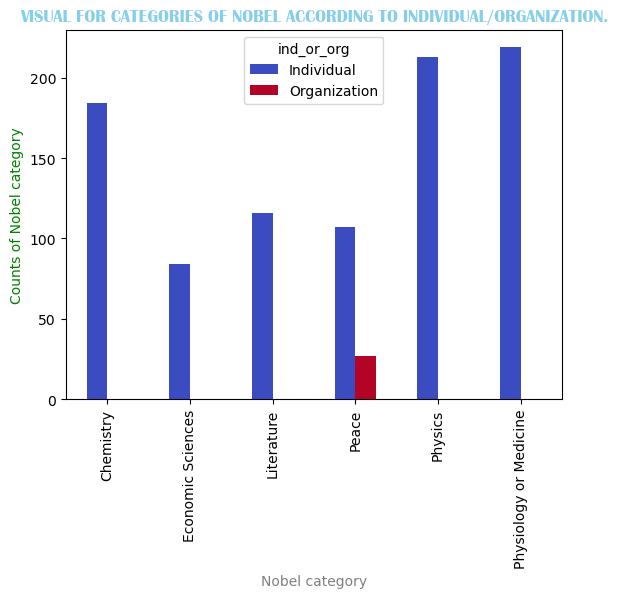

<Figure size 1000x600 with 0 Axes>

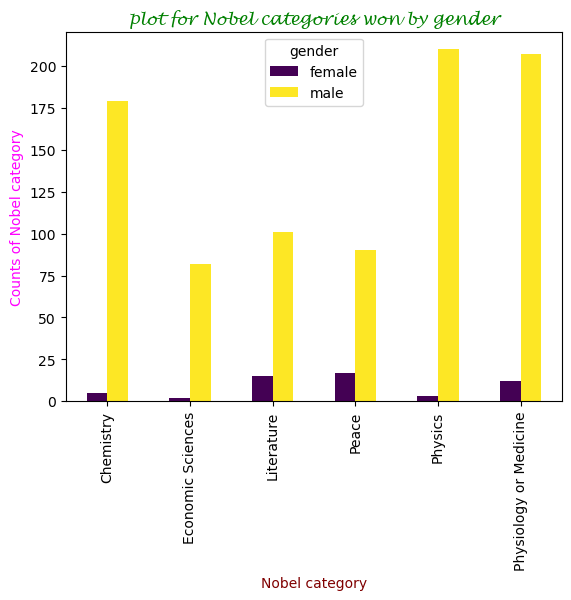



DISCUSSION
- Organization won Nobel prizes under Peace category only while, individual won in all categories.
- As per gender, Male dominated females in each Nobel category won.


In [49]:
ind_org = pd.crosstab(nobel['category'], nobel['ind_or_org'])
ind = pd.crosstab(nobel['category'],nobel['gender'])
# plot for the bargraphs
plt.figure(figsize = (10,6))
ind_org.plot(kind = 'bar', stacked = False, cmap = 'coolwarm')
plt.title('Visual for categories of nobel according to individual/organization.'.upper(), fontname = 'Britannic Bold', fontsize = 12, color = 'skyblue')
plt.xlabel('Nobel category', color = 'grey')
plt.ylabel('Counts of Nobel category', color = 'green')
plt.show()
#plot for nobel prizes according to gender
print('\n\n')
plt.figure(figsize = (10,6))
ind.plot(kind = 'bar', stacked = False, cmap = 'viridis')
plt.title('plot for Nobel categories won by gender', fontname = 'Lucida Handwriting', fontsize = 12, color = 'green')
plt.xlabel('Nobel category', color = 'maroon')
plt.ylabel('Counts of Nobel category', color = 'magenta')
plt.show()
print('\n')
print('Discussion'.upper())
print('- Organization won Nobel prizes under Peace category only while, individual won in all categories.\n- As per gender, Male dominated females in each Nobel category won.')

**End of Q1**

**Q2. Nobel laurates that were awarded more than once**

In [50]:
multiple_win = nobel.groupby(nobel['name']).agg({'prizeStatus':'count'}).sort_values(['prizeStatus'],ascending = False)
display(multiple_win.head(n = 10))
print('\n\n')
# table to visualize
from rich.table import Table
from rich.console import Console

console = Console()
table = Table(title = 'Nobel laurates with total prizes received.'.upper())

#adding column
table.add_column('INDEX', style = 'red')
table.add_column('NAME OF LAURATE',style = 'magenta')
table.add_column('CATEGORY',style = 'yellow')
table.add_column('total prizes received'.upper(),style = 'green')
#adding rows
table.add_row('1', 'International Committee of the Red Cross','Organization', '3')
table.add_row('2', 'Linus Pauling','Individual','2')
table.add_row('3','Office of the United Nations High Commissioner for Refugees','Organization','2')
table.add_row('4','Marie Curie','Individual','2')
table.add_row('5','John Bardeen','Individual','2')
table.add_row('6','Frederick Sanger','Individual','2')
table.add_row('7','Others','Organization/Individual','1')

console.print(table)

,prizeStatus
name,
International Committee of the Red Cross,3
Linus Pauling,2
Office of the United Nations High Commissioner for Refugees,2
Marie Curie,2
John Bardeen,2
Frederick Sanger,2
Octavio Paz,1
Norman Haworth,1
Norman F. Ramsey,1


                                    NOBEL LAURATES WITH TOTAL PRIZES RECEIVED.                                     
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ INDEX ┃ NAME OF LAURATE                                       ┃ CATEGORY                ┃ TOTAL PRIZES RECEIVED ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1     │ International Committee of the Red Cross              │ Organization            │ 3                     │
│ 2     │ Linus Pauling                                         │ Individual              │ 2                     │
│ 3     │ Office of the United Nations High Commissioner for    │ Organization            │ 2                     │
│       │ Refugees                                              │                         │                       │
│ 4     │ Marie Curie                                           │ Individual              │ 2                     │
│ 5     │ John Bardeen                                          │ Individual              │ 2                     │
│ 6     │ Frederick Sanger                                      │ Individual              │ 2                     │
│ 7     │ Others                                                │ Organization/Individual │ 1                     │
└───────┴───────────────────────────────────────────────────────┴─────────────────────────┴───────────────────────┘

**END OF Q2**

**Q3. Identifying which Nobel prize to go basing on the prize**

category
Economic Sciences         375000
Physiology or Medicine    150782
Peace                     150782
Chemistry                 150782
Literature                150782
Physics                   150782
Name: prizeAmount, dtype: int64



DISCUSSION
The Nobel prize under Economic sciences has a best prize amount value other than the other categories.


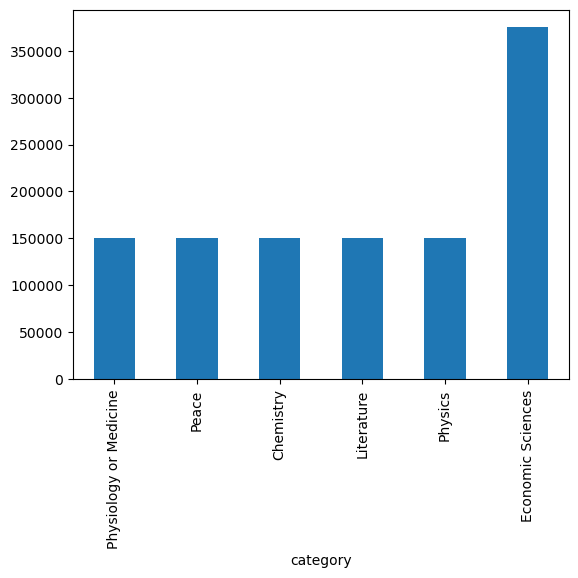

In [51]:
nobel_category_value = nobel.drop_duplicates(subset = ['category']).set_index('category')['prizeAmount']
print(nobel_category_value.sort_values(ascending = False))
nobel_category_value.plot(kind='bar')
print('\n\n')
print('DISCUSSION')
print('The Nobel prize under Economic sciences has a best prize amount value other than the other categories.')

**END OF Q3**

**Q4 Nobel prizes that were shared among two or more people collaboratively and their respective category**

In [52]:
nobel['portion'] = nobel['portion'].replace({'01-Feb':'2','01-Apr':'4','01-Mar':'3'})
after = nobel['portion'].unique()
print(f'Portion levels after replacing values:\n{after}')

Portion levels after replacing values:
['1' '2' '4' '3']


portion,1,2,3,4
category,,,,
Physiology or Medicine,39,74,90,16
Physics,47,82,48,36
Peace,68,60,6,0
Literature,108,8,0,0
Economic Sciences,25,38,21,0
Chemistry,63,54,51,16


<Figure size 1000x600 with 0 Axes>

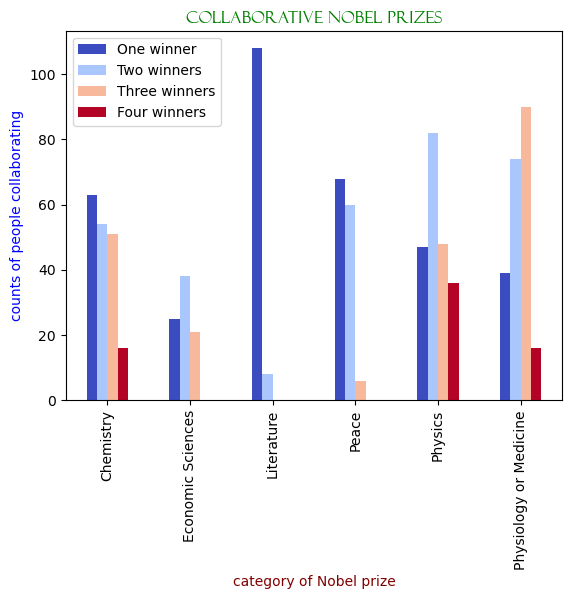




DISCUSSION
- Literature Nobel prize is mostly won by an individual with atmost 2 people collaborative.
- Chemistry, Physics, and Physiology or Medicine Nobel prizes had collaboration upto 4 people atmost.
- Economic Sciences and Peace Nobel prizes had collaboration upto 3 people atmost.


In [53]:
#collaborative nobel prize
collab_nobel = pd.crosstab(nobel['category'],nobel['portion'])
display(collab_nobel.sort_values(by='category',ascending=False))
print('\n\n')
plt.figure(figsize=(10,6))
collab_nobel.plot(kind = 'bar', stacked = False, cmap = 'coolwarm')
plt.title('COLLABORATIVE NOBEL PRIZES', fontname = 'Felix Titling', fontsize = '12', color = 'green')
plt.xlabel('category of Nobel prize', color = 'maroon')
plt.ylabel('counts of people collaborating', color = 'blue')
plt.legend(['One winner','Two winners','Three winners','Four winners'])
plt.show()
print('\n\n')
print('DISCUSSION')
print('- Literature Nobel prize is mostly won by an individual with atmost 2 people collaborative.\n- Chemistry, Physics, and Physiology or Medicine Nobel prizes had collaboration upto 4 people atmost.\n- Economic Sciences and Peace Nobel prizes had collaboration upto 3 people atmost.')

**END OF Q4**

**Q5. Identifying Nobel prize category that has been shared/collaborative.**

In [54]:
display(pd.crosstab(nobel['category'],nobel['portion']).sort_values(by='category',ascending=False))
print('Physics took a lead in coorperating upto 4 people so as to discover a solution to a problem.')

portion,1,2,3,4
category,,,,
Physiology or Medicine,39,74,90,16
Physics,47,82,48,36
Peace,68,60,6,0
Literature,108,8,0,0
Economic Sciences,25,38,21,0
Chemistry,63,54,51,16


Physics took a lead in coorperating upto 4 people so as to discover a solution to a problem.


**END OF Q5**

**Q6 No. of laurates born per country(top 10) with their categorical nobel prizes.**

In [55]:
nobel_category_country = pd.crosstab(nobel['category'],nobel['birth_country'])
display(nobel_category_country.sort_values(by = 'category',ascending=False))
print('\n\n')
print('TOP 10 COUNTRY IN OVERALL NOBEL PRIZES IRREGARDLESS OF CATEGORY')
combined_category_country = nobel.groupby(['birth_country']).agg({'category':'count'}).sort_values(['category'],ascending = False)
combined_category_country.head(n = 10)

birth_country,Argentina,Australia,Austria,Austria-Hungary,Austrian Empire,Bavaria,Belgian Congo,Belgium,Bosnia,Brazil,British India,British Mandate of Palestine,British Protectorate of Palestine,British West Indies,Bulgaria,Burma,Canada,Chile,China,Colombia,Costa Rica,Crete,Cyprus,Czechoslovakia,Denmark,East Friesland,East Timor,Egypt,Ethiopia,Faroe Islands (Denmark),Finland,France,Free City of Danzig,French Algeria,German-occupied Poland,Germany,Gold Coast,Guadeloupe Island,Guatemala,Hesse-Kassel,Hungary,Iceland,India,Iran,Iraq,Ireland,Italy,Japan,"Java, Dutch East Indies",Kenya,Korea,Liberia,Lithuania,Luxembourg,Madagascar,Mecklenburg,Mexico,Morocco,New Zealand,Nigeria,Northern Ireland,Norway,Ottoman Empire,Pakistan,Persia,Peru,Poland,Portugal,Prussia,Romania,Russia,Russian Empire,Saint Lucia,Schleswig,Scotland,South Africa,Southern Rhodesia,Spain,Sweden,Switzerland,Taiwan,Tibet,Trinidad and Tobago,Turkey,Tuscany,USA,USSR,Ukraine,United Kingdom,Venezuela,Vietnam,West Germany,Württemberg,Yemen,the Netherlands
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Physiology or Medicine,2,7,5,3,1,0,0,3,0,1,0,0,0,0,0,0,4,0,2,0,0,0,0,0,3,0,0,0,0,1,0,12,0,0,0,20,0,0,0,0,1,0,2,0,0,1,5,5,1,0,0,0,0,1,0,1,0,0,1,0,0,2,0,0,0,0,2,1,2,1,1,3,0,0,3,3,0,2,7,6,0,0,0,0,0,76,0,0,24,1,0,0,1,0,2
Physics,0,2,3,2,0,0,0,1,0,0,0,0,0,0,0,0,6,0,5,0,0,0,0,1,2,0,0,0,0,0,0,8,0,1,1,22,0,0,0,1,2,0,3,0,0,1,5,11,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,4,0,6,3,0,1,1,0,0,0,4,6,0,0,0,0,0,69,3,0,22,0,0,4,0,0,9
Peace,2,0,1,0,2,0,1,3,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0,1,0,2,3,1,0,1,9,0,0,0,6,1,0,1,0,0,0,1,1,1,0,0,1,0,1,1,2,0,0,0,0,1,0,0,0,4,2,1,1,0,0,2,0,0,1,1,2,0,0,2,3,1,0,5,3,0,1,0,0,0,19,1,0,5,0,1,0,0,1,1
Literature,0,0,2,2,0,0,0,1,1,0,1,0,0,0,1,0,2,2,2,1,0,1,0,0,4,1,0,1,0,0,0,11,1,1,0,4,0,1,1,0,1,1,1,0,0,3,5,3,0,0,0,0,0,0,1,0,1,0,0,1,1,2,1,0,1,1,3,1,2,1,4,4,1,1,0,2,0,5,7,1,0,0,1,1,1,9,1,1,6,0,0,0,0,0,0
Economic Sciences,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,4,0,0,0,2,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,2,0,0,2,0,0,0,2,0,0,0,0,0,0,47,0,0,6,0,0,0,0,0,2
Chemistry,0,1,3,6,1,1,0,1,0,0,0,3,1,0,0,0,4,0,1,0,0,0,0,0,1,0,0,2,0,0,0,9,0,0,0,23,0,0,0,0,2,0,1,0,0,0,1,7,0,0,1,0,1,0,0,0,1,0,2,0,0,2,0,0,0,0,1,0,5,1,3,3,0,0,3,1,0,0,4,3,1,0,0,1,0,54,0,0,24,0,0,1,0,0,4





TOP 10 COUNTRY IN OVERALL NOBEL PRIZES IRREGARDLESS OF CATEGORY


,category
birth_country,
USA,274
United Kingdom,87
Germany,77
France,53
Sweden,29
Japan,27
Canada,20
Switzerland,19
the Netherlands,18


**End of Q6**

**Q7. Nobel prizes distributed across continents per category.**

In [56]:
pd.crosstab(nobel['category'],nobel['birth_continent']).sort_values(by='category',ascending=False)

birth_continent,Africa,Asia,Europe,North America,Oceania,South America
category,,,,,,
Physiology or Medicine,3,10,114,80,8,4
Physics,2,20,114,75,2,0
Peace,13,13,53,23,2,3
Literature,6,10,80,16,0,4
Economic Sciences,0,3,30,51,0,0
Chemistry,3,16,103,59,3,0


**End of Q7**

**Q8. The average age of Laurates as per category of Nobel prizes.**

In [183]:
nobel[['death_date', 'birth_date']].head()

,death_date,birth_date
0,31/03/1917,1854-03-15
1,12/06/1912,1822-05-20
2,30/10/1910,1828-05-08
3,01/03/1911,1852-08-30
4,07/09/1907,1839-03-16


In [231]:
from datetime import datetime
def age_calculator():
    nobel['death_date'] = pd.to_datetime(nobel['death_date'], dayfirst=True, errors='coerce')
    nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')
    nobel['age_at_death'] = ((nobel['death_date'] - nobel['birth_date']).dt.days / 365.25).round(1)

    display(nobel[['birth_date','death_date','age_at_death']].head(n=12))
    
age_calculator()

,birth_date,death_date,age_at_death
0,1854-03-15,1917-03-31,63.0
1,1822-05-20,1912-06-12,90.1
2,1828-05-08,1910-10-30,82.5
3,1852-08-30,1911-03-01,58.5
4,1839-03-16,1907-09-07,68.5
5,1845-03-27,1923-02-10,77.9
6,1843-05-21,1914-03-16,70.8
7,1833-02-19,1906-12-07,73.8
8,1852-10-09,1919-07-15,66.8
9,1853-07-18,1928-02-04,74.5


In [239]:
print('The contingency table for average age of laurates per nobel prize category.')
avg_age_laurates = nobel.groupby(nobel['category']).agg({'age_at_death':'mean'}).sort_values(['age_at_death'],ascending = False)
avg_age_laurates.head(n = 10)

The contingency table for average age of laurates per nobel prize category.


,age_at_death
category,
Economic Sciences,84.875000
Physiology or Medicine,78.386957
Peace,77.978723
Literature,77.857627
Physics,77.615094
Chemistry,75.133333


**END OF Q8**

**Q9. Nobel Peace Prize motivations comparison against other Nobel Prize categories in terms of gender and location (country and continent.**

In [244]:
nobel.groupby(['category', 'gender']).agg(
    laureates=('gender', 'count'),
    distinct_continent=('birth_continent', 'unique'))

laureates  \
category               gender              
Chemistry              female          5   
                       male          179   
Economic Sciences      female          2   
                       male           82   
Literature             female         15   
                       male          101   
Peace                  female         17   
                       male           90   
Physics                female          3   
                       male          210   
Physiology or Medicine female         12   
                       male          207   

                                                              distinct_continent  
category               gender                                                     
Chemistry              female              [Europe, Africa, Asia, North America]  
                       male       [Europe, Oceania, North America, Asia, Africa]  
Economic Sciences      female                            [North America, Europe]  
                       male                        [Europe, North America, Asia]  
Literature             female  [Europe, North America, South America, Africa,...  
                       male    [Europe, Asia, North America, Africa, South Am...  
Peace                  female              [Europe, North America, Asia, Africa]  
                       male    [Europe, North America, South America, Africa,...  
Physics                female                            [Europe, North America]  
                       male       [Europe, Oceania, North America, Asia, Africa]  
Physiology or Medicine female             [Europe, North America, Oceania, Asia]  
                       male    [Europe, Asia, North America, Oceania, South A...

**END OF Q9**

**END OF EDA ON NOBEL PRIZES DATASET**

**END OF SECTION 2**

##

##

# 6. FINANCIAL TIME STOCK EXCHANGE DATASET

In [58]:
ftse = read_csv("C:/Users/FeLoH/Desktop/elphy/FTSE100-2.csv")
display(ftse)

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,3,Neutral


In [59]:
print('The shape of the dataset is:', len(ftse.columns), 'columns and', len(ftse), 'rows.')

The shape of the dataset is: 14 columns and 101 rows.


In [60]:
# variables names and corresponding data types.
print(f'Dataset columns name;\n{ftse.columns}\n')
print(ftse.info())

Dataset columns name;
Index(['Company', 'Shares', 'Ticker', 'Sector', 'Mid-price (p)', 'Change',
       'Our view', 'Brokers', 'Strong Buy', 'Buy', 'Neutral', 'Sell',
       'Strong Sell', 'Recommendation'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         101 non-null    object 
 1   Shares          101 non-null    int64  
 2   Ticker          101 non-null    object 
 3   Sector          101 non-null    object 
 4   Mid-price (p)   101 non-null    object 
 5   Change          101 non-null    object 
 6   Our view        101 non-null    object 
 7   Brokers         101 non-null    int64  
 8   Strong Buy      0 non-null      float64
 9   Buy             101 non-null    int64  
 10  Neutral         101 non-null    int64  
 11  Sell            101 non-null    int64  
 12  Strong Sell     101 non-null 

In [61]:
# dataset information
pd.set_option('display.max_columns', None)
ftse.describe()

,Shares,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell
count,101.000000,101.000000,0.0,101.000000,101.000000,101.000000,101.000000
mean,5281.792079,16.851485,NaN,7.099010,6.198020,2.049505,0.722772
std,3006.725858,4.744230,NaN,4.253246,3.307627,2.155812,1.001187
min,36.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,3015.000000,14.000000,NaN,4.000000,4.000000,0.000000,0.000000
50%,5349.000000,17.000000,NaN,7.000000,6.000000,1.000000,0.000000
75%,7896.000000,20.000000,NaN,10.000000,9.000000,3.000000,1.000000
max,9906.000000,29.000000,NaN,16.000000,16.000000,10.000000,4.000000


In [62]:
print('The sum of missing values columnwise:'.upper())
print(ftse.isna().sum())
#duplicates detection
print()
print(f"The dataset has a total of {ftse.duplicated().sum()} duplicated rows.")

THE SUM OF MISSING VALUES COLUMNWISE:
Company             0
Shares              0
Ticker              0
Sector              0
Mid-price (p)       0
Change              0
Our view            0
Brokers             0
Strong Buy        101
Buy                 0
Neutral             0
Sell                0
Strong Sell         0
Recommendation      0
dtype: int64

The dataset has a total of 0 duplicated rows.


**Q1. create a function tidy_rows that drops a given ticker in the ticker column contained in the dataframe.**

In [135]:
display(ftse['Ticker'].unique())
print(f"no. of tickers;{ftse['Ticker'].nunique()}")

array(['III', 'ADM', 'AAL', 'ANTO', 'AHT', 'ABF', 'AZN', 'AUTO', 'AVV',
       'AV.', 'BA.', 'BARC', 'BDEV', 'BKG', 'BHP', 'BP.', 'BATS', 'BLND',
       'BT-A', 'BNZL', 'BRBY', 'CCL', 'CNA', 'CCH', 'CPG', 'CRH', 'CRDA',
       'DCC', 'DGE', 'DLG', 'EVR', 'EXPN', 'FERG', 'FLTR', 'FRES', 'GSK',
       'GLEN', 'HLMA', 'HL.', 'HSX', 'HSBA', 'IMB', 'INF', 'IHG', 'IAG',
       'ITRK', 'ITV', 'JD.', 'JMAT', 'JE.', 'KGF', 'LAND', 'LGEN', 'LLOY',
       'LSE', 'MKS', 'MRO', 'MCRO', 'MNDI', 'MRW', 'NG.', 'NXT', 'NMC',
       'OCDO', 'PSON', 'PSN', 'PHNX', 'PRU', 'RB.', 'REL', 'RTO', 'RIO',
       'RMV', 'RR.', 'RBS', 'RDSA', 'RDSB', 'RSA', 'SGE', 'SBRY', 'SDR',
       'SMT', 'SGRO', 'SVT', 'SN.', 'SMDS', 'SMIN', 'SKG', 'SPX', 'SSE',
       'STAN', 'SLA', 'STJ', 'TW.', 'TSCO', 'TUI', 'ULVR', 'UU.', 'VOD',
       'WTB', 'WPP'], dtype=object)

no. of tickers;101


In [145]:
# creating the function
def tidy_rows():
    
    ftse_drop_ticker = ftse.drop(ftse[ftse['Ticker'] == 'CCL'].index)
    display(ftse_drop_ticker['Ticker'].unique())
    print(f"no. of tickers after dropping 'CCL';{ftse_drop_ticker['Ticker'].nunique()}")
    print('\n')
    display(ftse_drop_ticker.head())
    
tidy_rows()

array(['III', 'ADM', 'AAL', 'ANTO', 'AHT', 'ABF', 'AZN', 'AUTO', 'AVV',
       'AV.', 'BA.', 'BARC', 'BDEV', 'BKG', 'BHP', 'BP.', 'BATS', 'BLND',
       'BT-A', 'BNZL', 'BRBY', 'CNA', 'CCH', 'CPG', 'CRH', 'CRDA', 'DCC',
       'DGE', 'DLG', 'EVR', 'EXPN', 'FERG', 'FLTR', 'FRES', 'GSK', 'GLEN',
       'HLMA', 'HL.', 'HSX', 'HSBA', 'IMB', 'INF', 'IHG', 'IAG', 'ITRK',
       'ITV', 'JD.', 'JMAT', 'JE.', 'KGF', 'LAND', 'LGEN', 'LLOY', 'LSE',
       'MKS', 'MRO', 'MCRO', 'MNDI', 'MRW', 'NG.', 'NXT', 'NMC', 'OCDO',
       'PSON', 'PSN', 'PHNX', 'PRU', 'RB.', 'REL', 'RTO', 'RIO', 'RMV',
       'RR.', 'RBS', 'RDSA', 'RDSB', 'RSA', 'SGE', 'SBRY', 'SDR', 'SMT',
       'SGRO', 'SVT', 'SN.', 'SMDS', 'SMIN', 'SKG', 'SPX', 'SSE', 'STAN',
       'SLA', 'STJ', 'TW.', 'TSCO', 'TUI', 'ULVR', 'UU.', 'VOD', 'WTB',
       'WPP'], dtype=object)

no. of tickers after dropping 'CCL';100




,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy


**END OF Q1**

**Q2. create a function tidy_column that drops a given column contained in the dataframe.**

In [149]:
print(f'COLUMNS NAME:\n{ftse.columns}\n')
display(ftse.head())
print(f'shape of dataset:\n{ftse.shape}')

COLUMNS NAME:
Index(['Company', 'Shares', 'Ticker', 'Sector', 'Mid-price (p)', 'Change',
       'Our view', 'Brokers', 'Strong Buy', 'Buy', 'Neutral', 'Sell',
       'Strong Sell', 'Recommendation'],
      dtype='object')



,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy


shape of dataset:
(101, 14)


In [207]:
# function to drop a column
def tidy_columns():
    
    ftse_drop_columns = ftse.drop(columns = 'Strong Sell')
    print(f"COLUMNS NAMES AFTER DROPPING 'Strong Sell':\n{ftse_drop_columns.columns}\n")
    display(ftse_drop_columns.head())
    print(f'New shape of dataset:\n{ftse_drop_columns.shape}')
    
tidy_columns()

COLUMNS NAMES AFTER DROPPING 'Strong Sell':
Index(['Company', 'Shares', 'Ticker', 'Sector', 'Mid-price (p)', 'Change',
       'Our view', 'Brokers', 'Strong Buy', 'Buy', 'Neutral', 'Sell',
       'Recommendation'],
      dtype='object')



,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Recommendation
0,3i,4812,III,Financial Services,1099.5,0.0171,Hold,5,NaN,4,1,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.0,-0.42%,Hold,18,NaN,2,6,7,Underweight
2,Anglo American plc,5349,AAL,Mining,1744.0,0.0154,Hold,24,NaN,15,6,2,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,Overweight
4,Ashtead Group,9769,AHT,Support Services,2207.0,0.0347,Buy,17,NaN,12,5,0,Buy


New shape of dataset:
(101, 13)


**END OF Q2**

**Q3. Create a function convert_to_float that converts the values of a given column from string to floats.**

In [156]:
print(f"Data type for column Mid-price (p): {ftse['Mid-price (p)'].dtype}\n")
display(ftse['Mid-price (p)'])

Data type for column Mid-price (p): object



0      1,099.50
1      2,115.00
2      1,744.00
3         848.2
4      2,207.00
         ...   
96     5,151.00
97          808
98       155.88
99     4,357.00
100       970.6
Name: Mid-price (p), Length: 101, dtype: object

In [255]:
def convert_to_float():
    midprice_float = ftse.iloc[:,0:14]
    midprice_float['Mid-price (p)'] = pd.to_numeric(midprice_float['Mid-price (p)'].replace(",", "",regex = False), errors='coerce')
    print(midprice_float.info())
    

    return midprice_float
convert_to_float()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         101 non-null    object 
 1   Shares          101 non-null    int64  
 2   Ticker          101 non-null    object 
 3   Sector          101 non-null    object 
 4   Mid-price (p)   101 non-null    float64
 5   Change          101 non-null    object 
 6   Our view        101 non-null    object 
 7   Brokers         101 non-null    int64  
 8   Strong Buy      0 non-null      float64
 9   Buy             101 non-null    int64  
 10  Neutral         101 non-null    int64  
 11  Sell            101 non-null    int64  
 12  Strong Sell     101 non-null    int64  
 13  Recommendation  101 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 11.2+ KB
None


,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,1099.50,0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.00,-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,1744.00,0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.20,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,2207.00,0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,5151.00,0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808.00,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,4357.00,0.0035,Hold,22,NaN,3,12,3,3,Neutral


**END OF Q3**

**Q4. create function format_percentage_change that converts poorly formatted strings i. e % to float.**

In [212]:
ftse['Change'].dtype

dtype('O')

In [227]:
def format_percentage_change():
    
    change_format = ftse.copy()
    change_format['Change'] = pd.to_numeric(change_format['Change'].str.replace("%", "",regex = False), errors='coerce')
    print(change_format['Change'].dtype)
    #display(change_format)

    change_format['Change'] = pd.to_numeric(change_format['Change'], errors='coerce')
    # Multiply only positive values by 100
    positive = change_format['Change'] > 0
    change_format.loc[positive, 'Change'] *= 100

    return change_format
    
format_percentage_change()

float64


,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,1099.50,1.71,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.00,-0.42,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,1744.00,1.54,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.20,3.26,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,2207.00,3.47,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,5151.00,0.29,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808.00,0.25,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,2.03,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,4357.00,0.35,Hold,22,NaN,3,12,3,3,Neutral


**END OF Q4**

**Q5.Create a function holding_summary that takes as input a df and a tuple holding containing a company ticker code, the number of shares, and the price paid (in pence).**

In [277]:
def holding_summary(ftse, holding):
    ticker, shares, price_paid_pence = holding

# reuse of Mid-price converter to float function
    ftse_float = convert_to_float()

#mid-price for the ticker (in pence)
    current_price_pence = ftse_float.loc[ftse_float['Ticker'] == ticker, 'Mid-price (p)'].iloc[0]

#Converting pence currency into pounds
    price_paid_pound = price_paid_pence / 100
    current_price_pound = current_price_pence / 100

    holding_cost = shares * price_paid_pound
    holding_value = shares * current_price_pound
    change_in_value = ((current_price_pound - price_paid_pound) / price_paid_pound) * 100

    return {
        'holding_cost': holding_cost,
        'holding_value': holding_value,
        'change_in_value': change_in_value
    }
holding=('AZN', 500, 6700.00)
holding_summary(ftse, holding)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         101 non-null    object 
 1   Shares          101 non-null    int64  
 2   Ticker          101 non-null    object 
 3   Sector          101 non-null    object 
 4   Mid-price (p)   101 non-null    float64
 5   Change          101 non-null    object 
 6   Our view        101 non-null    object 
 7   Brokers         101 non-null    int64  
 8   Strong Buy      0 non-null      float64
 9   Buy             101 non-null    int64  
 10  Neutral         101 non-null    int64  
 11  Sell            101 non-null    int64  
 12  Strong Sell     101 non-null    int64  
 13  Recommendation  101 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 11.2+ KB
None


{'holding_cost': 33500.0,
 'holding_value': 36840.0,
 'change_in_value': 9.970149253731353}

**END OF Q5**

**Q6.Create a function market_comparison that returns a DataFrame with the following columns added to the input df**

In [276]:
def market_comparison(ftse):
    ftse_mc = ftse
#reuse of the format percentage function
    ftse_mc = format_percentage_change()

#average market change
    change_mean = ftse_mc['Change'].mean()

    ftse_mc['Beat_Market'] = ftse_mc['Change'] > change_mean
    ftse_mc['Buy'] = pd.to_numeric(ftse_mc['Buy'], errors='coerce')
    ftse_mc['Brokers'] = pd.to_numeric(ftse_mc['Brokers'], errors='coerce')
    ftse_mc['Buy Ratio'] = ftse_mc['Buy'] / ftse_mc['Brokers']

    return ftse_mc
    
df_market_comparison = market_comparison(ftse)
df_market_comparison['Buy Ratio'].mean()

float64


0.42744733247669425

**END OF Q6**

**Q7. Create a function identify_companies that takes as input a df and a list watchlist and returns a list of companies.**

In [282]:
def identify_companies(ftse, watchlist):
   
    selected_companies = []

    ftse['Mid-price (p)'] = pd.to_numeric(ftse['Mid-price (p)'], errors='coerce')
    ftse['Buy'] = pd.to_numeric(ftse['Buy'], errors='coerce')

    #dict for easy lookup on watchlist
    watch_dict = dict(watchlist)

    # Filter DataFrame with companies in the watchlist
    ftse_watch = ftse[ftse['Company'].isin(watch_dict.keys())]

    for idx, row in ftse_watch.iterrows():
        company = row['Company']
        mid_price = row['Mid-price (p)']
        buy_ratio = row['Buy']
        target_price = watch_dict[company]

        if (target_price >= mid_price) or (buy_ratio >= 0.5):
            selected_companies.append(company)

    return selected_companies

watchlist = [("Imperial Brands", 100.0), ("Aveva", 3900.0),("Barclays", 135.5), ("AstraZeneca", 750.0), ("VOD", 140.0)]
companies_list = identify_companies(ftse, watchlist)

print(companies_list)
print(len(companies_list))

['AstraZeneca', 'Aveva', 'Barclays', 'Imperial Brands']
4


**END OF Q7**

##

**END OF EDA ON FINANCIAL TIME STOCK EXCHANGE**

**END OF SECTION 3**